# Regresión Lineal Multiple

In [55]:
# Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Cargar Datos

In [56]:
# Importar el data set
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [57]:
type(X)

numpy.ndarray

In [58]:
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [60]:
dataset.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

## EDA (Análisis Exploratorio de Datos)

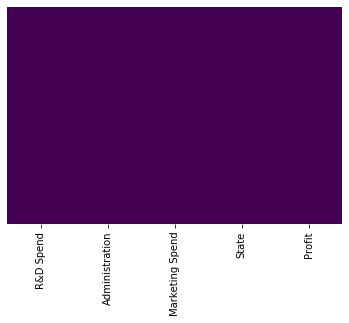

In [61]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

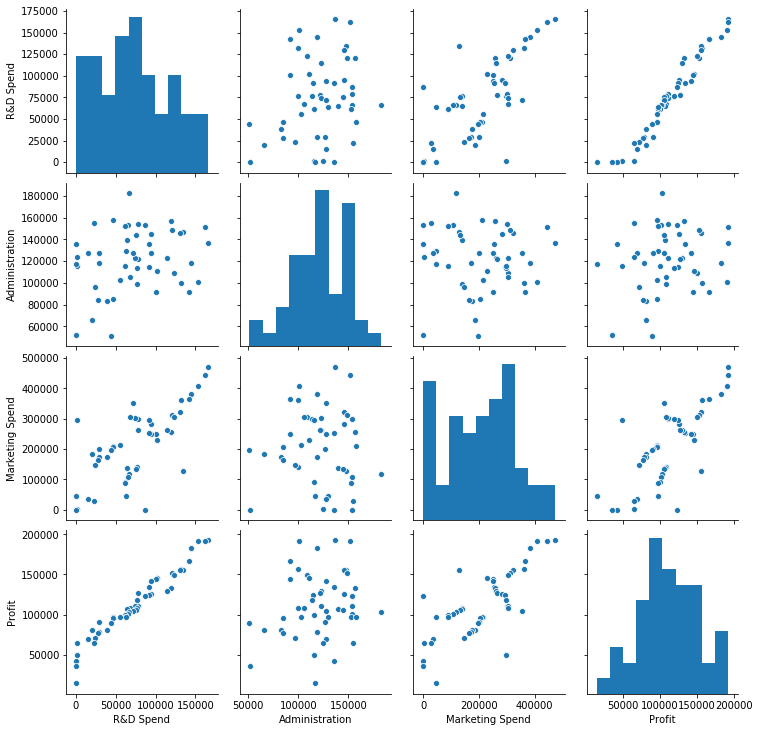

In [62]:
sns.pairplot(dataset,palette='Set1')

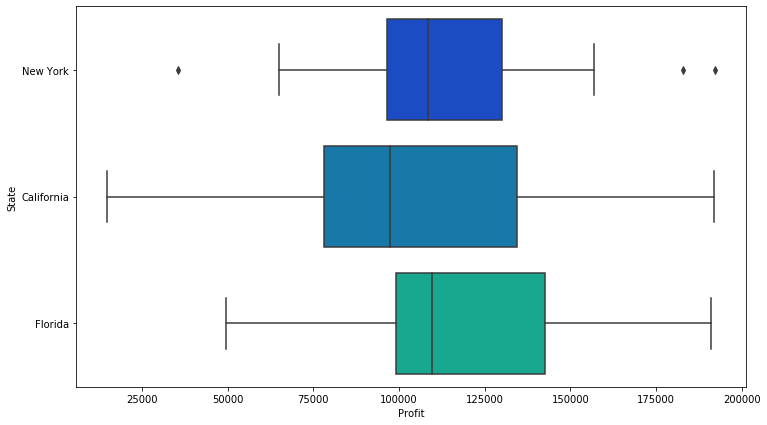

In [63]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Profit',y='State',data=dataset,palette='winter')

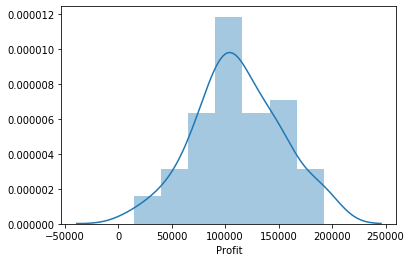

In [64]:
sns.distplot(dataset['Profit'])

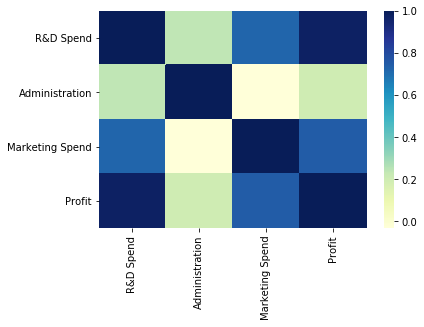

In [65]:
sns.heatmap(dataset.corr(),cmap="YlGnBu")

## Codificar datos categóricos

In [66]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop='first'), [3])],    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)
print(ct)
X = np.array(ct.fit_transform(X), dtype=np.float)

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder', OneHotEncoder(drop='first'),
                                 [3])])


In [67]:
print(X)

[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 [0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05]
 [1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05]
 [0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04 3.6286136e+05]
 [0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05 1.2771682e+05]
 [1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05 3.2387668e+05]
 [0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05 3.1161329e+05]
 [0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05]
 [1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05 2.2916095e+05]
 [0.0000000e+00 0.0000000e+00 1.0067196e+05 9.1790610e+04 2.4974455e+05]
 [1.0000000e+00 0.0000000e+00 9.3863750e+04 1.2732038e+05 2.4983944e+05]
 [0.0000000e+00 0.0000000e+00 9.1992390e+04 1.35495

## Dividir el data set en conjunto de entrenamiento y conjunto de testing

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Ajustar el modelo de Regresión lineal múltiple con el conjunto de entrenamiento

In [69]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

## Evaluación

In [70]:
#### imprimimos la intercepción
print(regression.intercept_)

42554.16761772438


In [71]:
Z=dataset[['R&D Spend','Administration','Marketing Spend','State','Profit']]

In [72]:
regression.coef_

array([-9.59284160e+02,  6.99369053e+02,  7.73467193e-01,  3.28845975e-02,
        3.66100259e-02])

In [73]:
coeff_df = pd.DataFrame(regression.coef_,Z.columns,columns=['Coefficient'])
coeff_df

Coefficient
R&D Spend        -959.284160
Administration    699.369053
Marketing Spend     0.773467
State               0.032885
Profit              0.036610

## Predicción de los resultados en el conjunto de testing

In [74]:
y_pred = regression.predict(X_test)

In [75]:
# Construir el modelo óptimo de RLM utilizando la Eliminación hacia atrás
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
SL = 0.05

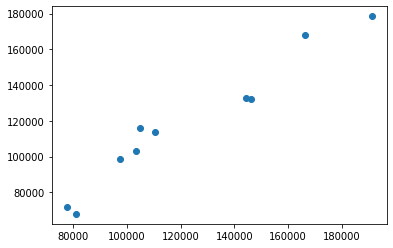

In [76]:
plt.scatter(y_test,y_pred)

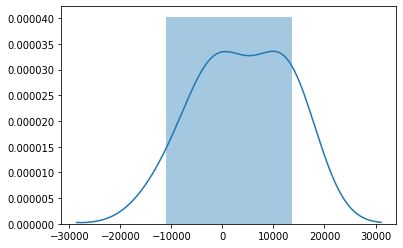

In [77]:
sns.distplot((y_test-y_pred))

In [78]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7514.293659640891
MSE: 83502864.03257468
RMSE: 9137.990152794797


## Visualización

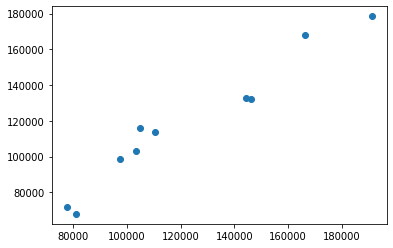

In [79]:
plt.scatter(y_test,y_pred)

## Construir el modelo óptimo de RLM utilizando la Eliminación hacia atrás

In [94]:
import statsmodels.api as sm

In [95]:
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
SL = 0.05


In [96]:
#Se ha añadido el modificador .tolist() al X_opt para adaptarse a Python 3.7

X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
#regression_OLS
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:37:32   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x1          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x2          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x3          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x4          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
x5          1.867e+04    950.026     19.651      0.000    1.68e+04    2.06e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     1.97e+80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.74e-159. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
X_opt = X[:, [0, 1, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:37:36   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
x1           2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
x2           2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
x3           2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
x4           2.24e+04   1140.031     19.651      0.000    2.01e+04    2.47e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     1.61e+64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.66e-127. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
X_opt = X[:, [0, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:37:54   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
x1            2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
x2            2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
x3            2.8e+04   1425.039     19.651      0.000    2.51e+04    3.09e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     1.47e+48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.2e-95. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:


X_opt = X[:, [0, 3, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:37:57   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.734e+04   1900.052     19.651      0.000    3.35e+04    4.12e+04
x1          3.734e+04   1900.052     19.651      0.000    3.35e+04    4.12e+04
x2          3.734e+04   1900.052     19.651      0.000    3.35e+04    4.12e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     4.06e+32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.12e-64. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
X_opt = X[:, [0, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 31 May 2020   Prob (F-statistic):                nan
Time:                        01:38:01   Log-Likelihood:                -600.65
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      49   BIC:                             1205.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.601e+04   2850.077     19.651      0.000    5.03e+04    6.17e+04
x1          5.601e+04   2850.077     19.651      0.000    5.03e+04    6.17e+04
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.068
Skew:                           0.023   Prob(JB):                        0.966
Kurtosis:                       2.825   Cond. No.                     4.91e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.15e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""